In [734]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
%matplotlib inline 

In [814]:
df = pd.read_csv("data\Hotel Reservations.csv")

In [736]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [738]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Checking for Null Values

In [740]:
# CHECKING FOR NULL VALUES
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# Data Exploration and Preprocessing

### Exploratory Data Analysis  'EDA'

#### Splitting features into numeric and categorical

In [744]:
df_cat = ['type_of_meal_plan','required_car_parking_space','room_type_reserved',
               'market_segment_type','repeated_guest','booking_status']
df_num = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

#### DROPPING UNNESSCARY COLUMNS 

In [816]:
df.drop(columns=["Booking_ID"],inplace=True)

#### Discovering The Distribution of each Numeric Feature

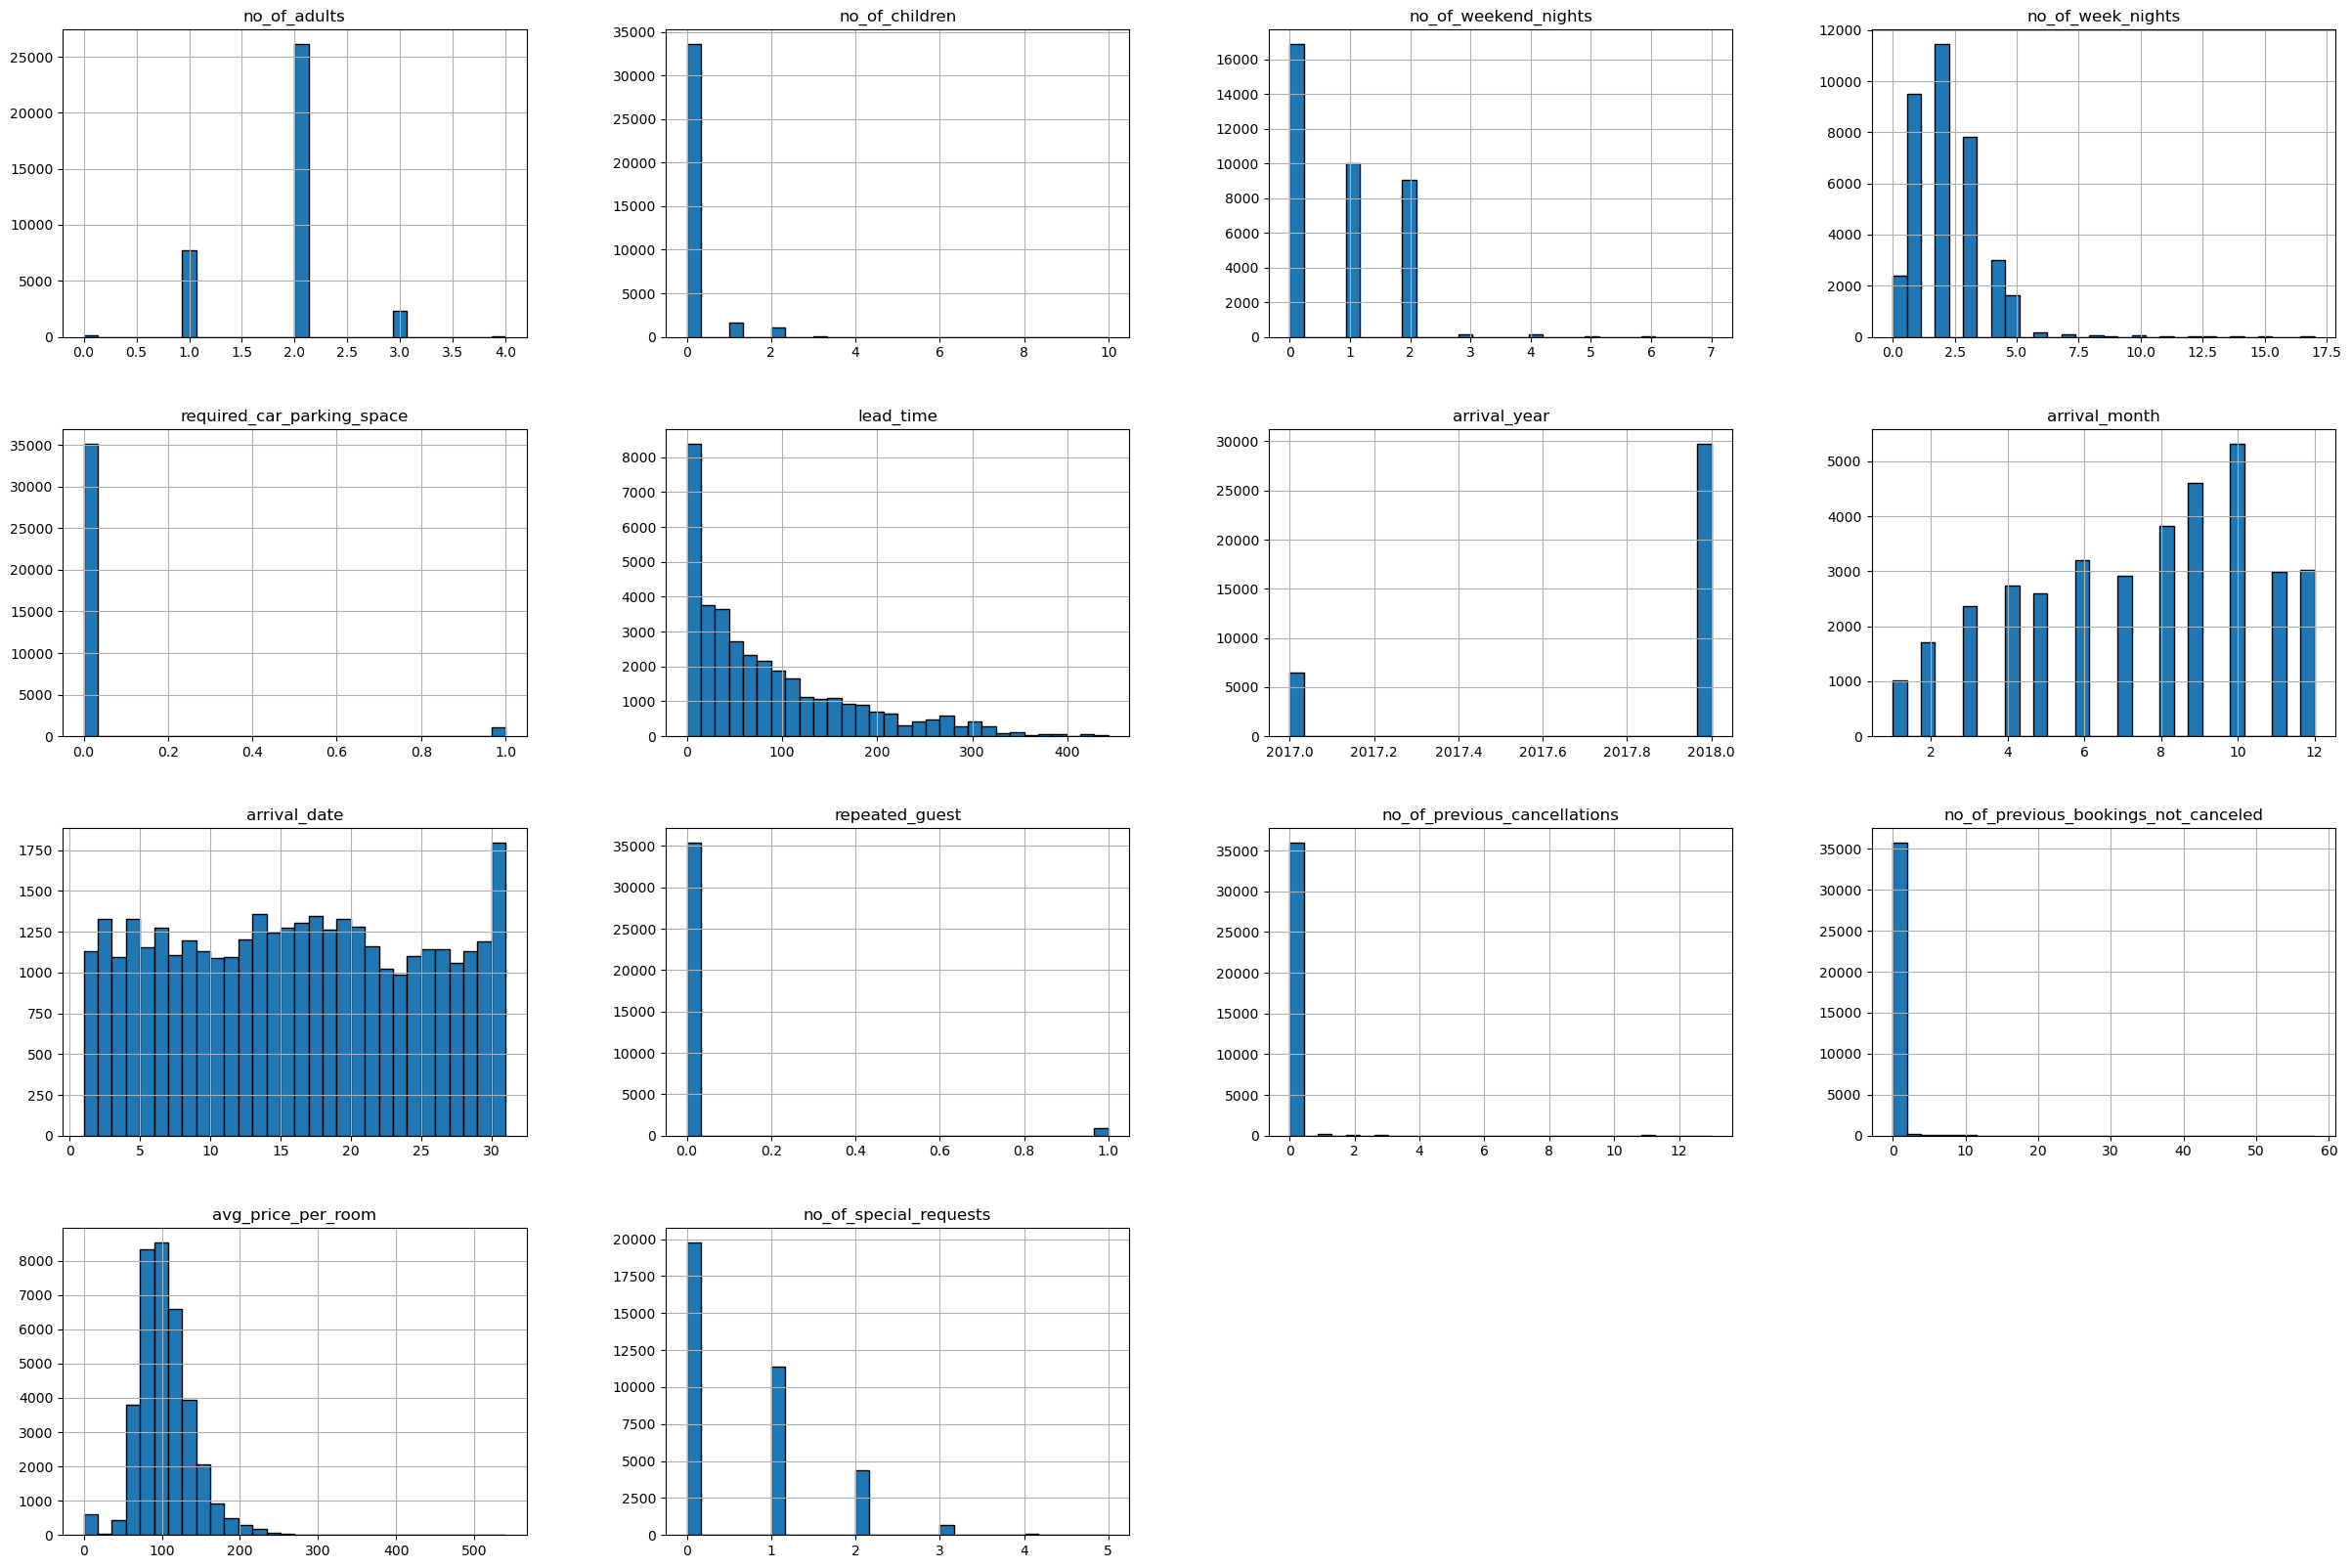

In [748]:
df.hist(bins=30,edgecolor='black',figsize=(30,20))
plt.show()

#### Number of Reservations for each Month
#### How many guests cancel or didn't cancel for each month?

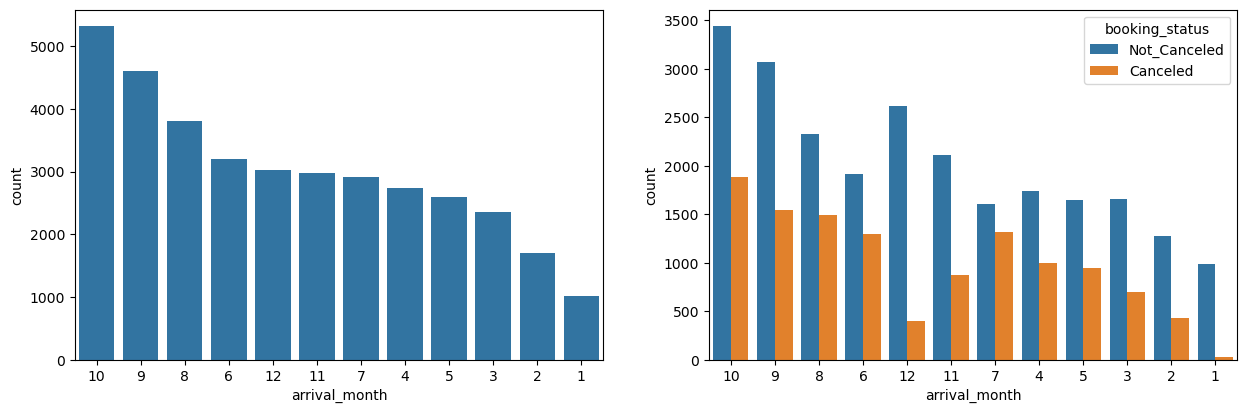

In [750]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x= 'arrival_month', data= df, order=df['arrival_month'].value_counts().index)
plt.subplot(2,2,2)
sns.countplot(x= 'arrival_month',hue="booking_status", data= df,
              order=df['arrival_month'].value_counts().index)
plt.show()

#### Most Reserved Meal Plan  

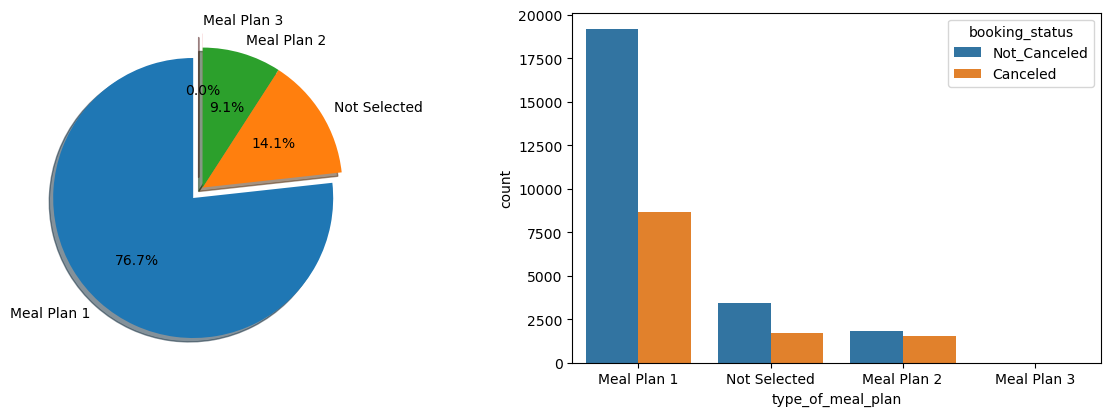

In [752]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
labels = 'Meal Plan 1','Not Selected', 'Meal Plan 2','Meal Plan 3'
sizes = df['type_of_meal_plan'].value_counts()
explode = (0.1,0, 0,0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.subplot(2,2,2)
sns.countplot(x= 'type_of_meal_plan',hue='booking_status', data= df)
plt.show()

#### Most Reserved Room Type  
#### How many guests cancel or didn't cancel for each Room Type?

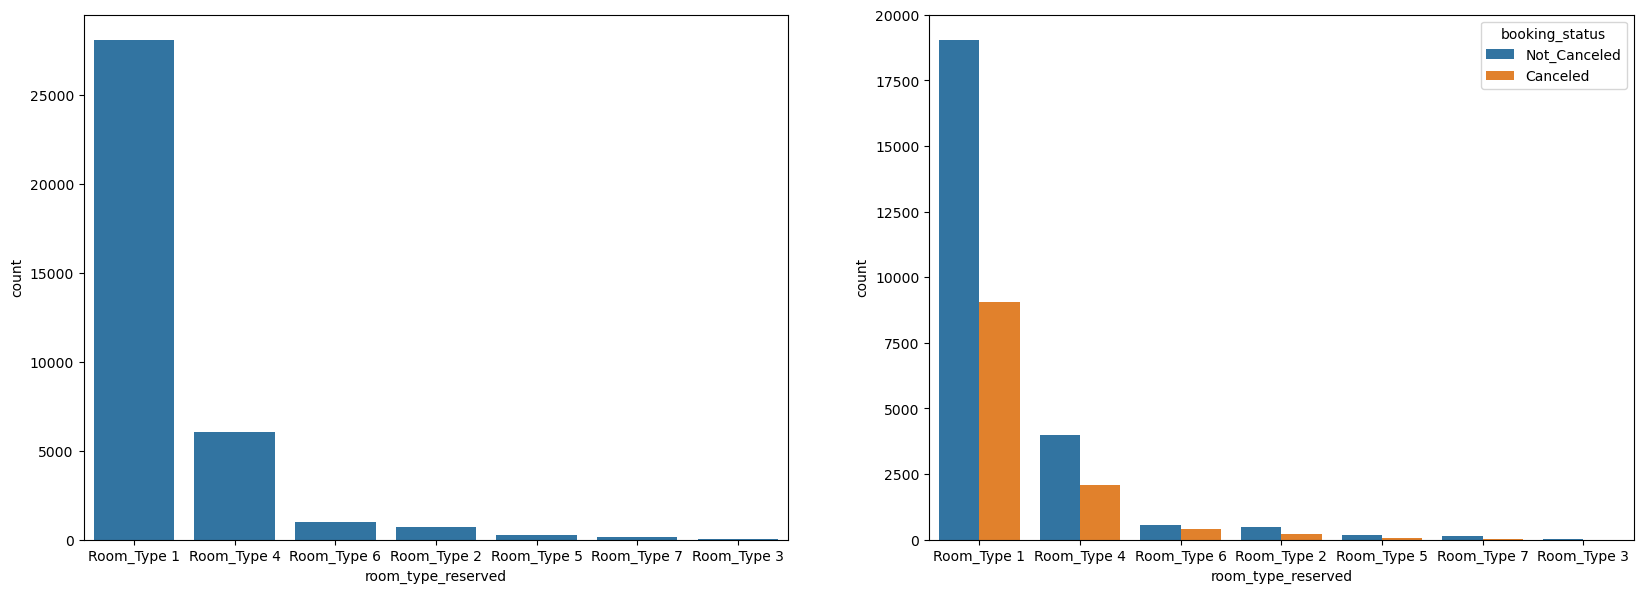

In [754]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x= 'room_type_reserved', data= df,
              order=df['room_type_reserved'].value_counts().index)
plt.subplot(2,2,2)
sns.countplot(x= 'room_type_reserved',hue='booking_status', data= df,
              order=df['room_type_reserved'].value_counts().index)
plt.show()

#### Average Room Price for each Room Type

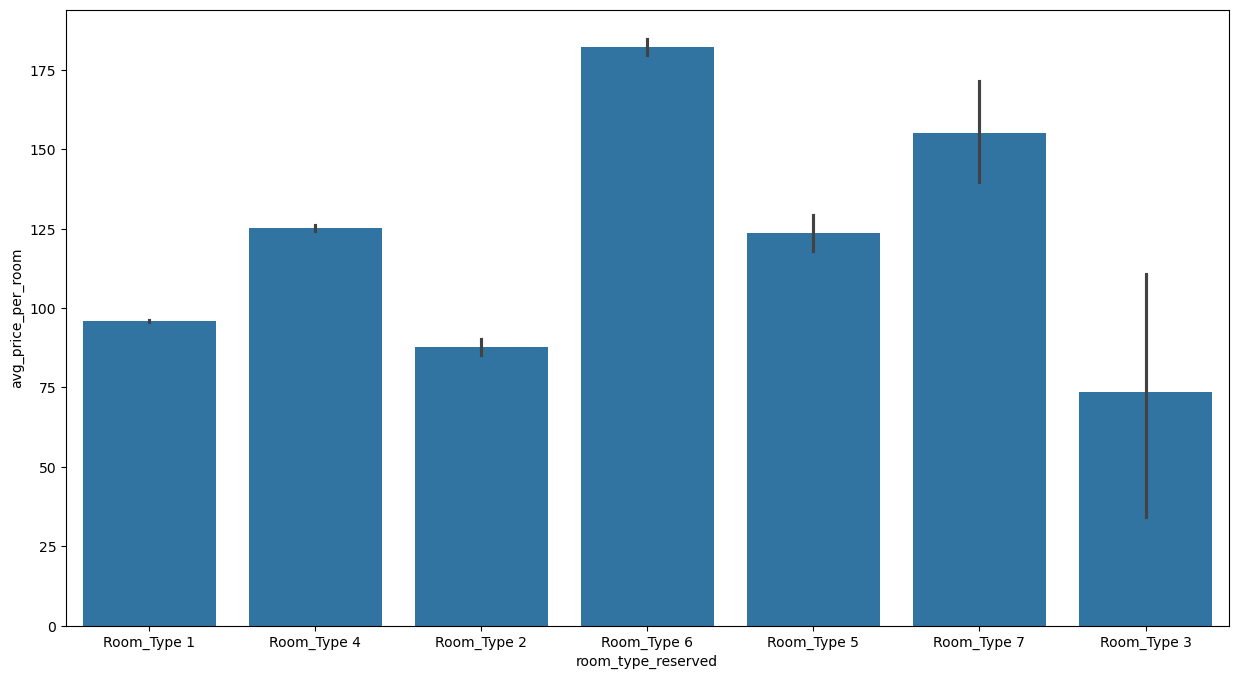

In [756]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['room_type_reserved'],y=df['avg_price_per_room'])
plt.show()

#### Market Segment with the Most Reservations and the Market Segment with the Most Cancellations

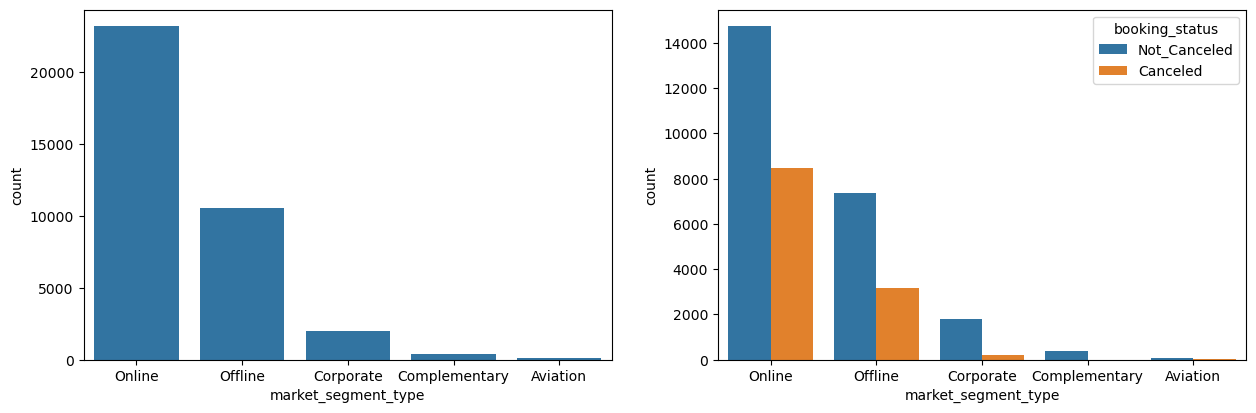

In [758]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x= 'market_segment_type', data= df,
              order=df['market_segment_type'].value_counts().index)
plt.subplot(2,2,2)
sns.countplot(x= 'market_segment_type',hue='booking_status', data= df,
              order=df['market_segment_type'].value_counts().index)
plt.show()

#### Count of Reservations Based on Number of Guests' Special Requests
#### Relationship Between These Counts and Booking Status

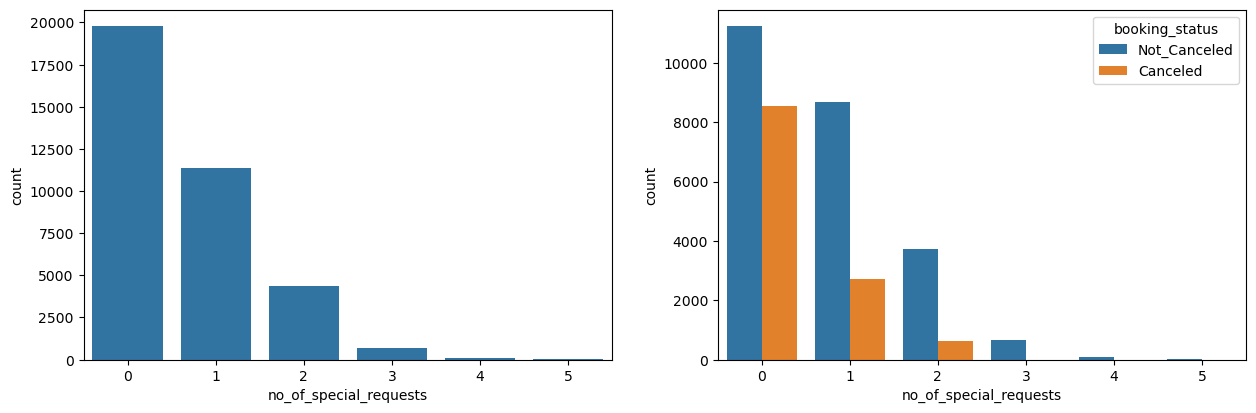

In [760]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x= 'no_of_special_requests', data= df)
plt.subplot(2,2,2)
sns.countplot(x= 'no_of_special_requests',hue='booking_status', data= df)
plt.show()

#### Relationship Between Average Room Price and Lead Time for Each Booking Status

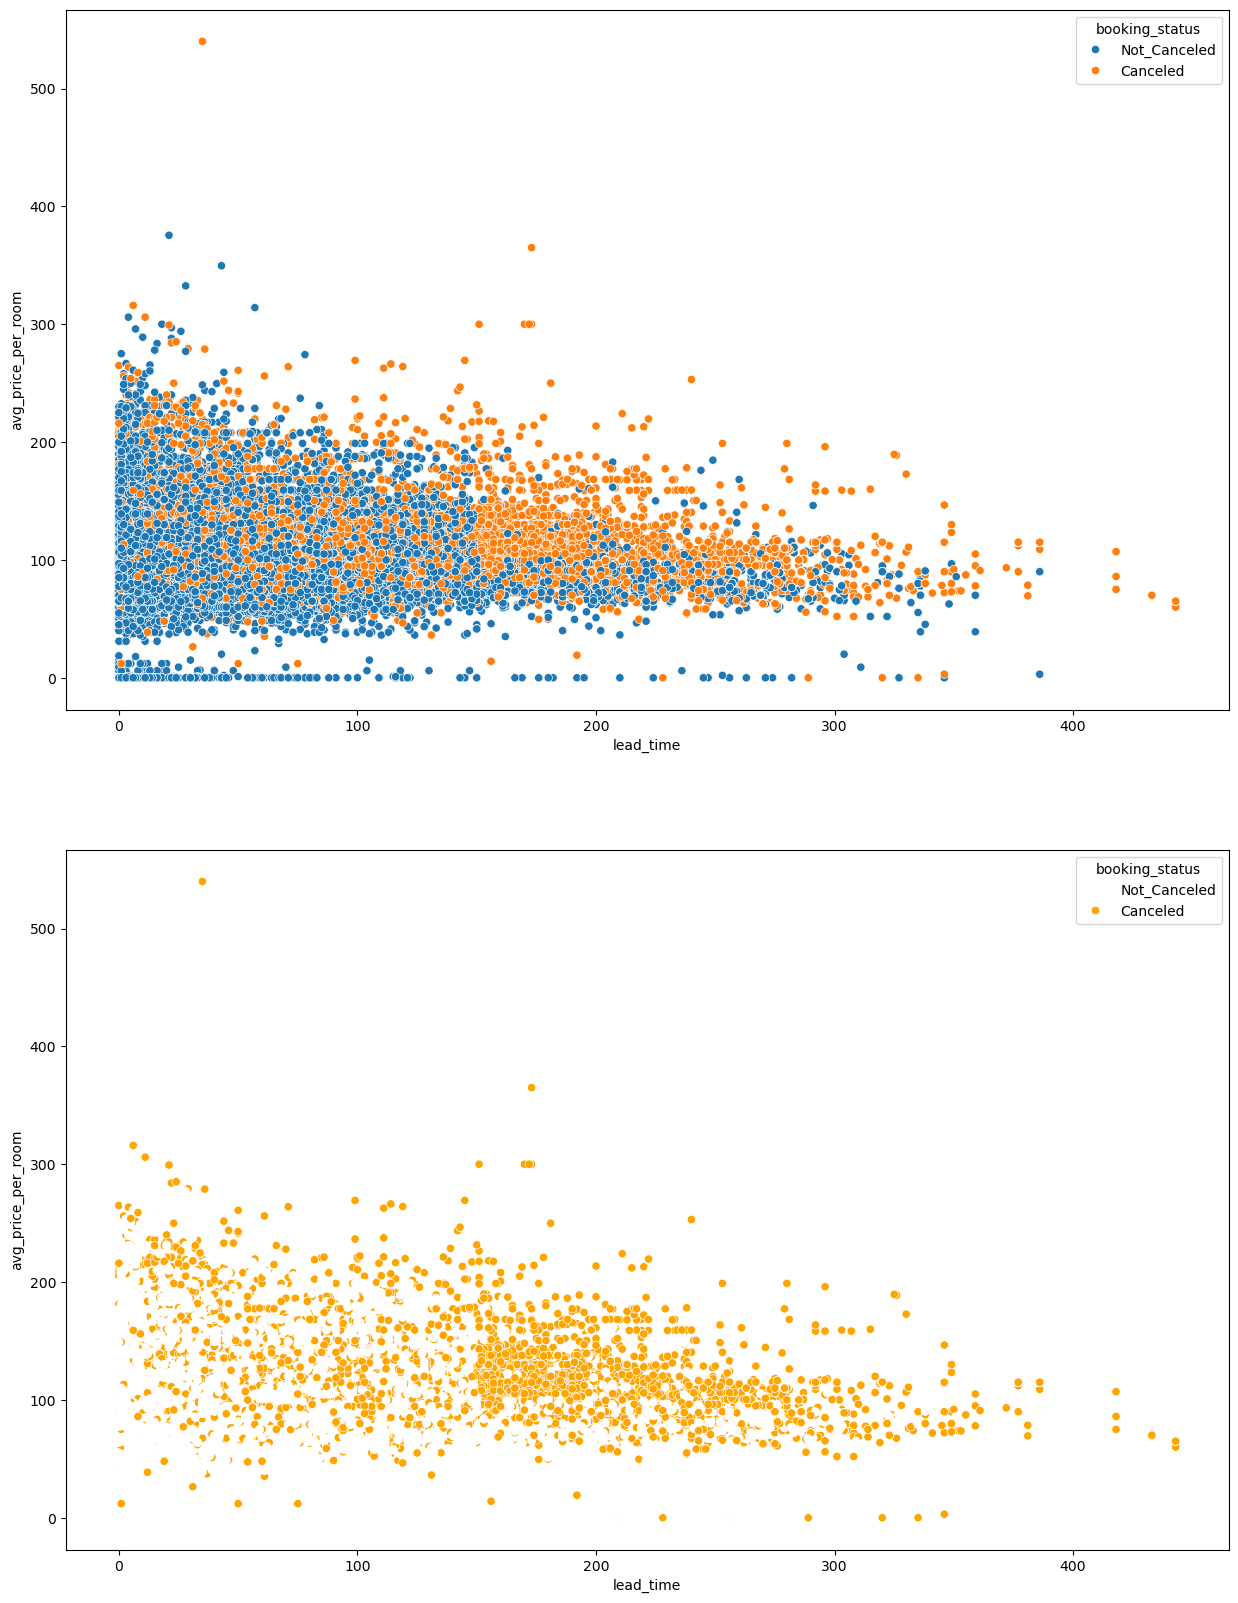

In [762]:

plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
sns.scatterplot(x='lead_time',y='avg_price_per_room',data=df,hue='booking_status')
plt.subplot(2,1,2)
custom_palette = {'Not_Canceled': 'white', 'Canceled': 'orange'}
sns.scatterplot(x='lead_time',y='avg_price_per_room',data=df,hue='booking_status', 
                palette=custom_palette)
plt.show()

#### We could observe that the intensity of canceled reservations is significant when the lead time exceeds 150. 
#### We could envision a horizontal line on the 150 lead time axis.

#### Another visualization to reinforce what we have observed.

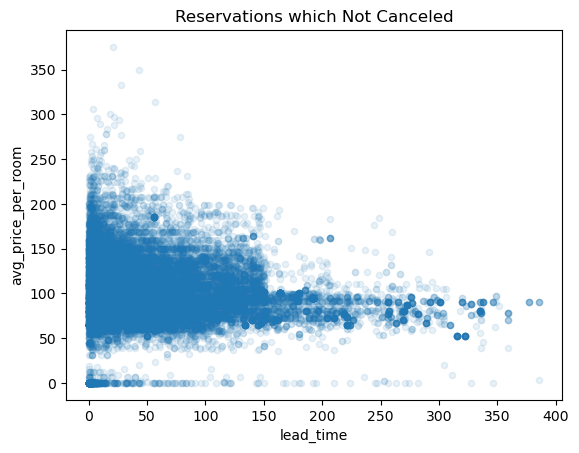

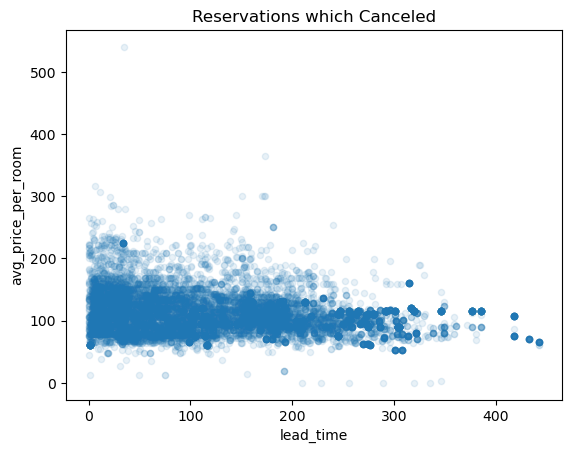

In [765]:
dfsct = df[df['booking_status'] == 'Not_Canceled']
dfsct.plot(kind="scatter", x="lead_time", y="avg_price_per_room",alpha=0.1)
plt.title("Reservations which Not Canceled")
dfsct = df[df['booking_status'] == 'Canceled']
dfsct.plot(kind="scatter", x="lead_time", y="avg_price_per_room",alpha=0.1)
plt.title("Reservations which Canceled")
plt.show()

#### Repeated guest and required car parking space

<Axes: xlabel='required_car_parking_space', ylabel='count'>

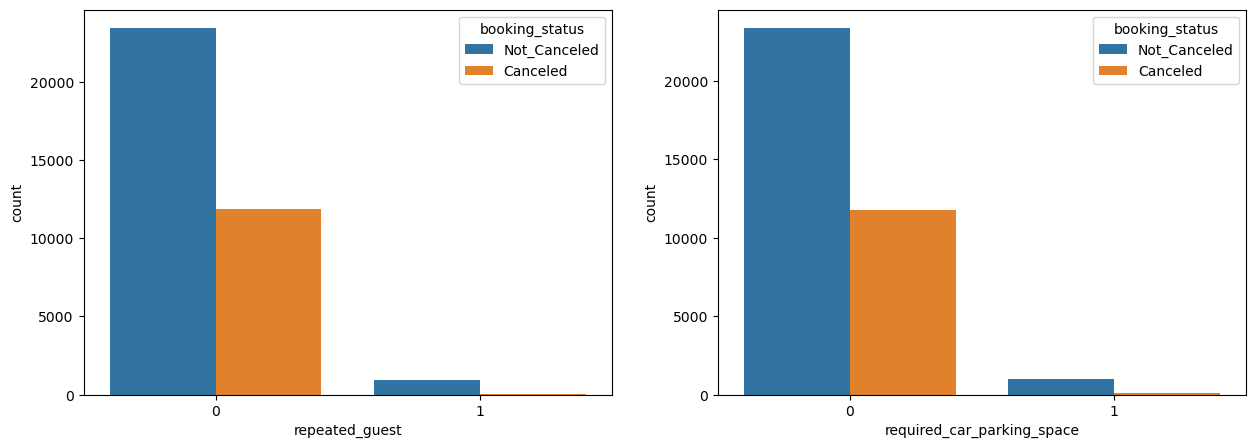

In [767]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='repeated_guest',hue=df['booking_status'],data=df)
plt.subplot(1,2,2)
sns.countplot(x='required_car_parking_space',hue=df['booking_status'],data=df)

#### Checking for outliers in The Lead Time and Average Room Price Features

<Axes: >

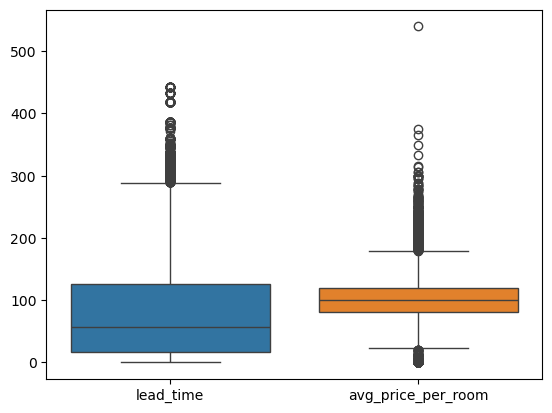

In [769]:
#plt.figure(figsize=(5,5))
plot_num = ['lead_time','avg_price_per_room']
sns.boxplot(data=df[plot_num])

#### We observe that Lead Time has a positive correlation of 0.44 with the target variable Booking 
#### Status. Additionally, the Number of Special Requests exhibits a negative correlation of 0.25 with 
#### the target variable. Furthermore, 'no_of_previous_cancellations' and 
#### 'no_of_previous_bookings_not_canceled' have a positive correlation of 0.47 with each other. 
#### Therefore, we will choose only one of them for the model. Given that the 'repeated_guest' feature  has a correlation with the target variable higher than both 'no_of_previous_cancellations' and 
#### 'no_of_previous_bookings_not_canceled', and it is also correlated with each of them, we could use it instead of the two cancellation features.

# Data Splitting

### Transforming the Target variable

In [818]:
bstut = {"Not_Canceled":0, "Canceled":1}
df["booking_status"] = df["booking_status"].apply(lambda x: bstut[x])

#### Splitting our dataset into Training set, Cross Validation Set, Test Set 

In [775]:
# Spliting our dataset into Training set and Test set
Y = df["booking_status"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],Y,test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.25, random_state=42)

<Axes: >

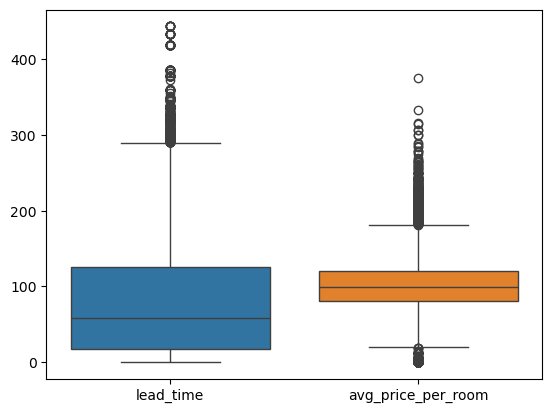

In [776]:
plot_num = ['lead_time','avg_price_per_room']
sns.boxplot(data=x_train[plot_num])

# Feature Engineering

#### We will experiment with converting the arrival month feature into a new feature called 'SEASON,' representing the seasons of the year: Spring, Summer, Autumn, Winter, derived from the months feature


#### Encoding Categorical Features 
##### This Function include encoding categorical features and creating the new features too

In [780]:
def encoding_Categorical(x):
    meal = {'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}
    x['type_of_meal_plan'] = x['type_of_meal_plan'].apply(lambda x: meal[x])
    room = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 
        'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
    x['room_type_reserved'] = x['room_type_reserved'].apply(lambda x: room[x])
    segment = {'Corporate': 0, 'Online': 1, 'Offline': 2, 'Complementary': 3, 'Aviation': 4}
    x['market_segment_type'] = x['market_segment_type'].apply(lambda x: segment[x])
    arvyear = {2017: 0, 2018: 1}
    x['arrival_year'] = x['arrival_year'].apply(lambda x: arvyear[x])
    #Creating Season Feature
    seasons = {1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 0}
    x['season'] = x['arrival_month'].apply(lambda x: seasons[x])
    column = x.pop('season')
    x.insert(10, column.name , column)
    return x

### Feature Selection

#### Correlation matrix for all Numeric Features

In [783]:
df = encoding_Categorical(df.copy())
x_train = encoding_Categorical(x_train.copy())
x_val = encoding_Categorical(x_val.copy())
x_test = encoding_Categorical(x_test.copy())

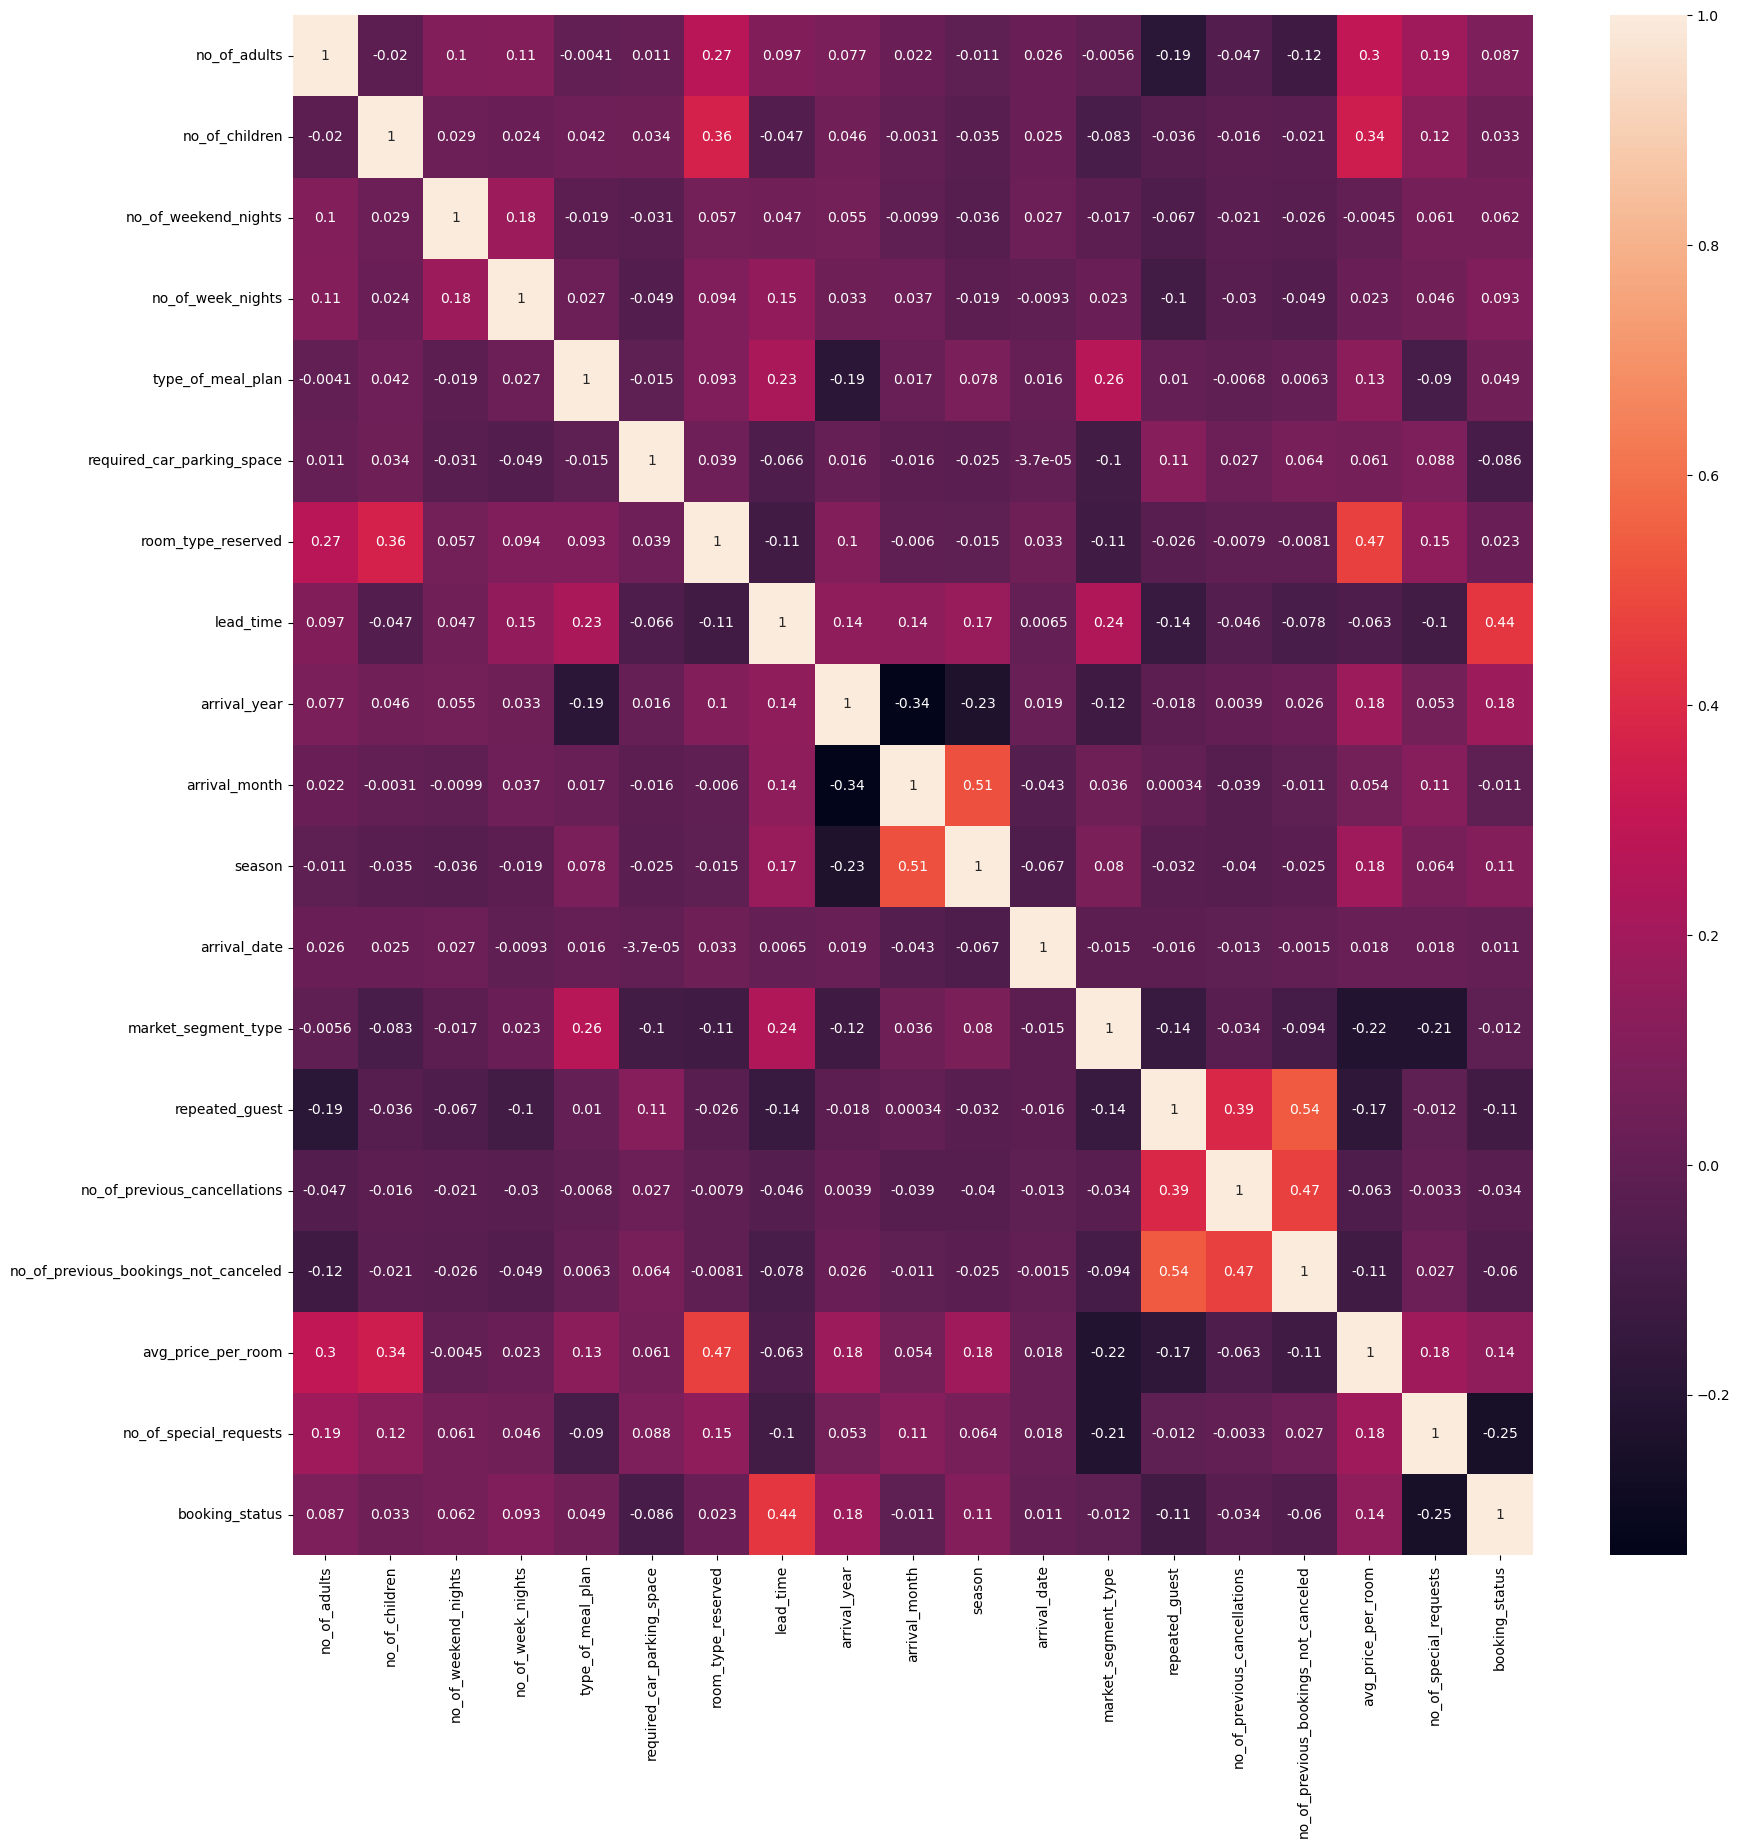

In [784]:
corr =df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

In [785]:
corr = df.corr()
corr["booking_status"].abs().sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.438538
no_of_special_requests                  0.253070
arrival_year                            0.179529
avg_price_per_room                      0.142569
season                                  0.107997
repeated_guest                          0.107287
no_of_week_nights                       0.092996
no_of_adults                            0.086920
required_car_parking_space              0.086185
no_of_weekend_nights                    0.061563
no_of_previous_bookings_not_canceled    0.060179
type_of_meal_plan                       0.049374
no_of_previous_cancellations            0.033728
no_of_children                          0.033078
room_type_reserved                      0.022986
market_segment_type                     0.012288
arrival_month                           0.011233
arrival_date                            0.010629
Name: booking_status, dtype: float64

In [786]:
x_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'season', 'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [787]:
# Selected Features
Features = ['no_of_adults','no_of_children', 'no_of_weekend_nights','no_of_week_nights'
       , 'type_of_meal_plan','lead_time','arrival_year','season'
       ,'arrival_date', 'market_segment_type','repeated_guest',
       'avg_price_per_room', 'no_of_special_requests']
x_train = x_train[Features]
x_val = x_val[Features]
x_test = x_test[Features]

## Feature Scalling

##### Computing variances of all features before Scalling

In [790]:
x_train.var().sort_values(ascending=False)

lead_time                 7349.073657
avg_price_per_room        1250.117215
arrival_date                76.431983
no_of_week_nights            1.968901
season                       1.170607
no_of_weekend_nights         0.753150
no_of_special_requests       0.615852
market_segment_type          0.351662
no_of_adults                 0.272713
type_of_meal_plan            0.228589
no_of_children               0.166313
arrival_year                 0.147704
repeated_guest               0.025330
dtype: float64

In [791]:
def FeatureScaling(x):
    scaler = StandardScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    return x,scaler

In [792]:
x_train_sc,scaler = FeatureScaling(np.array(x_train.copy()))

In [793]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,lead_time,arrival_year,season,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
16474,2,0,0,1,2,55,1,1,6,2,0,104.00,0
26660,1,0,0,3,1,271,1,3,21,2,0,85.67,0
2433,2,0,0,5,2,230,1,3,6,1,0,137.00,0
5612,2,0,1,2,0,23,1,3,17,1,0,119.00,3
34484,2,0,1,2,0,4,0,3,6,1,0,104.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,2,2,1,2,1,47,1,1,15,1,0,173.12,2
17814,1,0,2,1,1,20,1,0,7,1,0,86.00,2
27346,1,0,0,3,1,9,1,1,1,1,0,71.84,1
30983,2,1,0,3,1,83,1,2,28,1,0,141.10,1


In [794]:
x_train.shape, x_train.iloc[:, -1].shape

((21765, 13), (21765,))

In [795]:
xt = np.array(x_train_sc)
xv = np.array(x_val)
xtest= np.array(x_test)
yval= np.array(y_val)
ytest= np.array(y_test)
ytrain = np.array(y_train)

# Model Selection

### Logistics Regression

In [798]:
lr = LogisticRegression()
lr.fit(xt, ytrain)

xv = scaler.transform(xv)
y_pred_lr = lr.predict(xv)

acc_lr = accuracy_score(yval, y_pred_lr)
conf = confusion_matrix(yval, y_pred_lr)
clf_report = classification_report(yval, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : % {acc_lr*100}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : % 79.131633356306
Confusion Matrix : 
[[4342  495]
 [1019 1399]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      4837
           1       0.74      0.58      0.65      2418

    accuracy                           0.79      7255
   macro avg       0.77      0.74      0.75      7255
weighted avg       0.79      0.79      0.78      7255



### KNN 

In [800]:
knn = KNeighborsClassifier()
knn.fit(xt, ytrain)

y_pred_knn = knn.predict(xv)

acc_knn = accuracy_score(yval, y_pred_knn)
conf = confusion_matrix(yval, y_pred_knn)
clf_report = classification_report(yval, y_pred_knn)

print(f"Accuracy Score of KNN is : % {acc_knn*100}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : % 84.36940041350792
Confusion Matrix : 
[[4347  490]
 [ 644 1774]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4837
           1       0.78      0.73      0.76      2418

    accuracy                           0.84      7255
   macro avg       0.83      0.82      0.82      7255
weighted avg       0.84      0.84      0.84      7255



### DecisionTree

In [802]:
dtc = DecisionTreeClassifier()
dtc.fit(xt, ytrain)

y_pred_dtc = dtc.predict(xv)

acc_dtc = accuracy_score(yval, y_pred_dtc)
conf = confusion_matrix(yval, y_pred_dtc)
clf_report = classification_report(yval, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : % {acc_dtc*100}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : % 85.66505858028945
Confusion Matrix : 
[[4310  527]
 [ 513 1905]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4837
           1       0.78      0.79      0.79      2418

    accuracy                           0.86      7255
   macro avg       0.84      0.84      0.84      7255
weighted avg       0.86      0.86      0.86      7255



### Random Forest

In [804]:
rd_clf = RandomForestClassifier()
rd_clf.fit(xt, ytrain)

y_pred_rd_clf = rd_clf.predict(xv)

acc_rd_clf = accuracy_score(yval, y_pred_rd_clf)
conf = confusion_matrix(yval, y_pred_rd_clf)
clf_report = classification_report(yval, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : % {acc_rd_clf*100}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

feature_importances = rd_clf.feature_importances_
feature_importance_ranking = sorted(zip(feature_importances, range(len(feature_importances))), reverse=True)
print(f"Feature Importances :")
feature_importance_ranking

Accuracy Score of Random Forest is : % 89.15230875258442
Confusion Matrix : 
[[4562  275]
 [ 512 1906]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4837
           1       0.87      0.79      0.83      2418

    accuracy                           0.89      7255
   macro avg       0.89      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255

Feature Importances :


[(0.33190889111666855, 5),
 (0.18226792683029266, 11),
 (0.10420885935087223, 8),
 (0.09531219653873707, 12),
 (0.057136874243344384, 3),
 (0.049272443533861204, 9),
 (0.049116269599149005, 7),
 (0.03929688333979905, 2),
 (0.028113091982555287, 0),
 (0.025695475446138285, 6),
 (0.025156380483401, 4),
 (0.009328867252369177, 1),
 (0.0031858402828120573, 10)]

### XGBoost

In [806]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(xt, ytrain)

y_pred_xgb = xgb.predict(xv)

acc_xgb = accuracy_score(yval, y_pred_xgb)
conf = confusion_matrix(yval, y_pred_xgb)
clf_report = classification_report(yval, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : % {acc_xgb*100}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : % 87.63611302549965
Confusion Matrix : 
[[4531  306]
 [ 591 1827]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4837
           1       0.86      0.76      0.80      2418

    accuracy                           0.88      7255
   macro avg       0.87      0.85      0.86      7255
weighted avg       0.88      0.88      0.87      7255



### Voting Classifier

In [808]:
voting = VotingClassifier(estimators=[("rd_clf",rd_clf),("dtc",dtc),("xgb",xgb)],
                          voting="soft",weights=[1,2.5,1.5])
voting.fit(xt, ytrain)
print("Accuracy of Voting Classifier : % {}".format(voting.score(xv,yval)*100))

Accuracy of Voting Classifier : % 85.63749138525155


# Testing The Best Model "Random Forest"

In [810]:
rd_clf = RandomForestClassifier()
rd_clf.fit(xt, ytrain)

xtest = scaler.transform(xtest)
y_pred_rd_clf = rd_clf.predict(xtest)

acc_rd_clf = accuracy_score(ytest, y_pred_rd_clf)
conf = confusion_matrix(ytest, y_pred_rd_clf)
clf_report = classification_report(ytest, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : % {acc_rd_clf*100}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

feature_importances = rd_clf.feature_importances_
feature_importance_ranking = sorted(zip(feature_importances, range(len(feature_importances))), reverse=True)
print(f"Feature Importances :")
feature_importance_ranking

Accuracy Score of Random Forest is : % 89.44176430048243
Confusion Matrix : 
[[4569  270]
 [ 496 1920]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4839
           1       0.88      0.79      0.83      2416

    accuracy                           0.89      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.89      0.89      0.89      7255

Feature Importances :


[(0.32735918871486014, 5),
 (0.17984187769890675, 11),
 (0.10477555697222936, 8),
 (0.09812462820869029, 12),
 (0.057567562853779286, 3),
 (0.05003150616512182, 7),
 (0.048734667159181816, 9),
 (0.03853639214088861, 2),
 (0.02856347617856349, 0),
 (0.026657934047743314, 4),
 (0.026256800887801465, 6),
 (0.009403846756980774, 1),
 (0.004146562215252823, 10)]

# FINAL PREDICTION FUNCTION FOR NEW DATA

In [812]:
def Predict_Booking_Status(new_data):
    new_data = encoding_Categorical(new_data.copy())
    new_data = np.array(new_data[Features].copy())
    new_data = scaler.transform(new_data.copy())
    predictions = rd_clf.predict(new_data)
    return predictions

In [ ]:
# ORIGINAL DATA EXAMPLE 
df = pd.read_csv("data\Hotel Reservations.csv")
df.drop(columns=["Booking_ID"],inplace=True)
bstut = {"Not_Canceled":0, "Canceled":1}
df["booking_status"] = df["booking_status"].apply(lambda x: bstut[x])

In [820]:
NEW_DATA = df.iloc[5:100]
y_pred_rd_clf = Predict_Booking_Status(NEW_DATA)

In [822]:
acc_rd_clf = accuracy_score(NEW_DATA.iloc[:,-1], y_pred_rd_clf)
acc_rd_clf

0.9789473684210527